Hospital Admission Trends & Bed Occupancy Analysis

In [2]:
##-----library Installation----
!pip install prophet


In [3]:
##----Import Libraries----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [4]:
##----Load Dataset----

df = pd.read_csv('hospital_admissions_synthetic.csv')

df['Admission_Date'] = pd.to_datetime(df['Admission_Date'])
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'])
df.head()

,Patient_ID,Age,Gender,Department,Admission_Type,Admission_Date,Discharge_Date,Length_of_Stay_Days,Total_Beds,Beds_Occupied,Bed_Occupancy_Rate,Wait_Time_Minutes
0,P00001,3,Male,Pediatrics,Emergency,2024-08-22,2024-09-06,15,115,21,18.26,150
1,P00002,28,Male,Neurology,Scheduled,2025-05-25,2025-05-26,1,72,26,36.11,469
2,P00003,74,Female,Orthopedics,Emergency,2023-11-15,2023-11-30,15,138,96,69.57,268
3,P00004,13,Female,Cardiology,Scheduled,2024-09-20,2024-09-25,5,132,62,46.97,827
4,P00005,23,Male,Orthopedics,Scheduled,2024-11-15,2024-11-26,11,113,24,21.24,782


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Patient_ID           2000 non-null   object        
 1   Age                  2000 non-null   int64         
 2   Gender               2000 non-null   object        
 3   Department           2000 non-null   object        
 4   Admission_Type       2000 non-null   object        
 5   Admission_Date       2000 non-null   datetime64[ns]
 6   Discharge_Date       2000 non-null   datetime64[ns]
 7   Length_of_Stay_Days  2000 non-null   int64         
 8   Total_Beds           2000 non-null   int64         
 9   Beds_Occupied        2000 non-null   int64         
 10  Bed_Occupancy_Rate   2000 non-null   float64       
 11  Wait_Time_Minutes    2000 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 187.6+ KB


#### As we can see that there is total 2000 rows and 12 columns in this dataset
#### But the datatype of Admission Date and Discharge date should be in date_time
#### Also there is no any null values

In [7]:
##----Data Cleaning & Preprocessing----

In [6]:
# to check duplicate values
df.duplicated().sum()

0

In [7]:
# Check for missing values
print(df.isnull().sum())

# Create additional time features
df['Month'] = df['Admission_Date'].dt.month
df['Year'] = df['Admission_Date'].dt.year


Patient_ID             0
Age                    0
Gender                 0
Department             0
Admission_Type         0
Admission_Date         0
Discharge_Date         0
Length_of_Stay_Days    0
Total_Beds             0
Beds_Occupied          0
Bed_Occupancy_Rate     0
Wait_Time_Minutes      0
dtype: int64


In [8]:
df.describe()#to check the max,min,avrg of numerical columns

,Age,Admission_Date,Discharge_Date,Length_of_Stay_Days,Total_Beds,Beds_Occupied,Bed_Occupancy_Rate,Wait_Time_Minutes,Month,Year
count,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,44.953000,2024-08-30 23:23:16.800000,2024-09-07 20:03:50.400000,7.861500,98.683500,58.695000,60.681855,450.056500,6.573500,2024.161000
min,1.000000,2023-08-25 00:00:00,2023-08-30 00:00:00,1.000000,50.000000,20.000000,13.790000,5.000000,1.000000,2023.000000
25%,23.000000,2024-03-06 18:00:00,2024-03-13 00:00:00,4.000000,74.000000,36.000000,42.240000,138.000000,4.000000,2024.000000
50%,45.000000,2024-09-11 00:00:00,2024-09-18 12:00:00,8.000000,98.000000,53.000000,60.795000,254.000000,7.000000,2024.000000
75%,66.000000,2025-02-27 06:00:00,2025-03-06 00:00:00,12.000000,124.000000,76.000000,80.525000,758.000000,10.000000,2025.000000
max,90.000000,2025-08-24 00:00:00,2025-09-06 00:00:00,15.000000,150.000000,149.000000,100.000000,1440.000000,12.000000,2025.000000
std,25.760058,NaN,NaN,4.343011,29.067521,28.229797,23.234577,416.446095,3.436059,0.690882


In [9]:
df['Gender'].value_counts() # we can see the number of male and female patients

Gender
Male      1019
Female     981
Name: count, dtype: int64

In [9]:
##----Exploratory Data Analysis (EDA)----

In [ ]:
##----Patients demographics-----

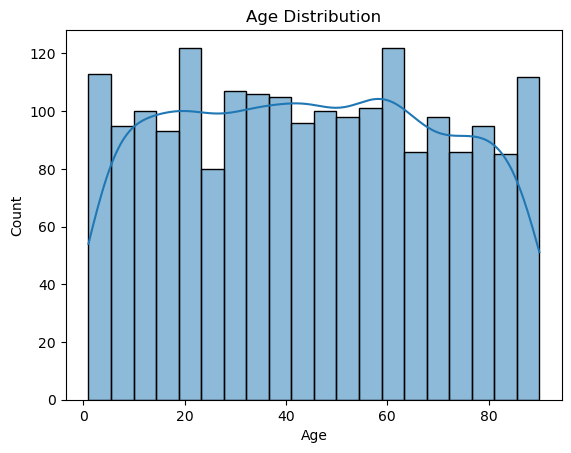

In [10]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

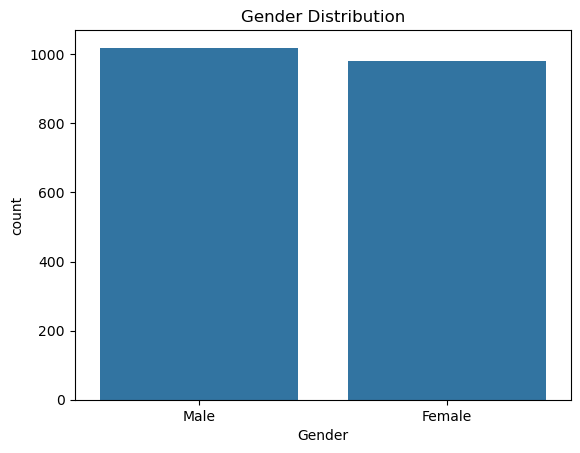

In [11]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

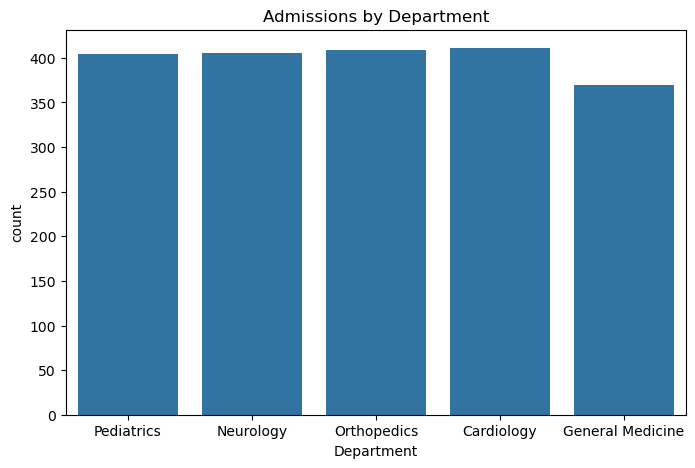

In [12]:
# Admissions by department
plt.figure(figsize=(8,5))
sns.countplot(x='Department', data=df)
plt.title("Admissions by Department")
plt.show()

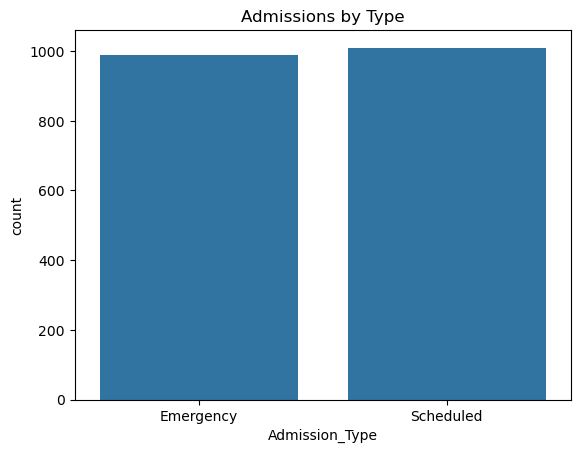

In [13]:
sns.countplot(x='Admission_Type', data=df)
plt.title("Admissions by Type")
plt.show()

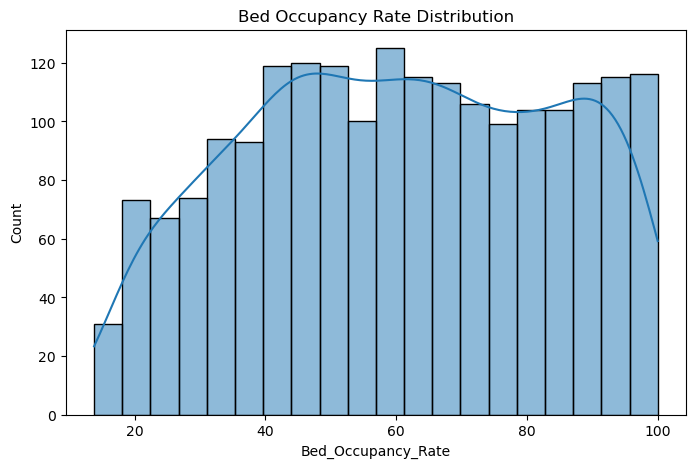

In [11]:
# Bed Occupancy Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Bed_Occupancy_Rate'], bins=20, kde=True)
plt.title("Bed Occupancy Rate Distribution")
plt.show()

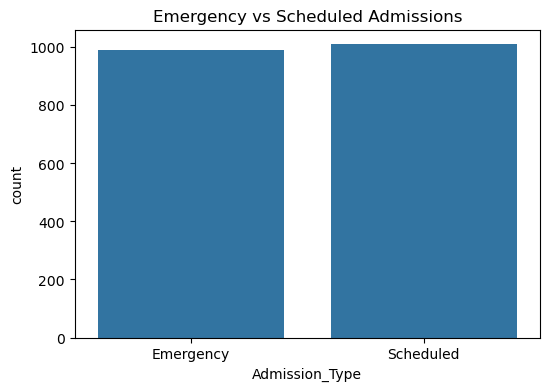

In [14]:
# Emergency vs Scheduled
plt.figure(figsize=(6,4))
sns.countplot(x='Admission_Type', data=df)
plt.title("Emergency vs Scheduled Admissions")
plt.show()

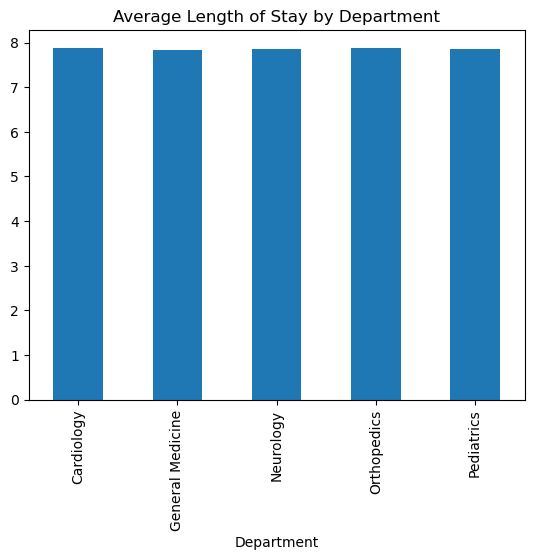

In [15]:
# Average length of stay by department
df.groupby('Department')['Length_of_Stay_Days'].mean().plot(kind='bar')
plt.title("Average Length of Stay by Department")
plt.show()

In [13]:
##----Feature Engineering----

In [16]:
# Stay duration in days
df['Stay_Duration'] = (df['Discharge_Date'] - df['Admission_Date']).dt.days

print(df[['Admission_Date', 'Discharge_Date', 'Stay_Duration']].head())


  Admission_Date Discharge_Date  Stay_Duration
0     2024-08-22     2024-09-06             15
1     2025-05-25     2025-05-26              1
2     2023-11-15     2023-11-30             15
3     2024-09-20     2024-09-25              5
4     2024-11-15     2024-11-26             11


In [17]:
# Occupancy Flag (High/Medium/Low)
def  occupancy_category(rate):
    if rate > 80:
        return "High"
    elif rate>=50:
        return "Medium"
    else:
        return "Low"

df['Occupancy_Level']=df['Bed_Occupancy_Rate'].apply(occupancy_category)
print(df[['Bed_Occupancy_Rate', 'Occupancy_Level']].head())

   Bed_Occupancy_Rate Occupancy_Level
0               18.26             Low
1               36.11             Low
2               69.57          Medium
3               46.97             Low
4               21.24             Low


In [18]:
# Age Groups
def age_group(age):
    if age < 18:
        return "Child"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"

# Only if 'Age' column exists
if 'Age' in df.columns:
    df['Age_Group'] = df['Age'].apply(age_group)
    print(df[['Age', 'Age_Group']].head())


   Age Age_Group
0    3     Child
1   28     Adult
2   74    Senior
3   13     Child
4   23     Adult


In [17]:
## Statistical Analysis

In [19]:
# Descriptive Statistics

print("Descriptive Statistics for Bed Occupancy Rate: ")
print(df['Bed_Occupancy_Rate'].describe())

Descriptive Statistics for Bed Occupancy Rate: 
count    2000.000000
mean       60.681855
std        23.234577
min        13.790000
25%        42.240000
50%        60.795000
75%        80.525000
max       100.000000
Name: Bed_Occupancy_Rate, dtype: float64


In [20]:
# Group wise Analysis

# Average Bed Occupancy Rate by Department
print("\nAverage Bed Occupancy Rate by Department:")
print(df.groupby('Department')['Bed_Occupancy_Rate'].mean())



Average Bed Occupancy Rate by Department:
Department
Cardiology          59.674915
General Medicine    61.582649
Neurology           61.246133
Orthopedics         60.888655
Pediatrics          60.104827
Name: Bed_Occupancy_Rate, dtype: float64


In [21]:
# Average Stay Duration by Admission Type (if Stay_Duration exists)
if 'Stay_Duration' in df.columns:
    print("\nAverage Stay Duration by Admission Type:")
    print(df.groupby('Admission_Type')['Stay_Duration'].mean())


Average Stay Duration by Admission Type:
Admission_Type
Emergency    7.765657
Scheduled    7.955446
Name: Stay_Duration, dtype: float64


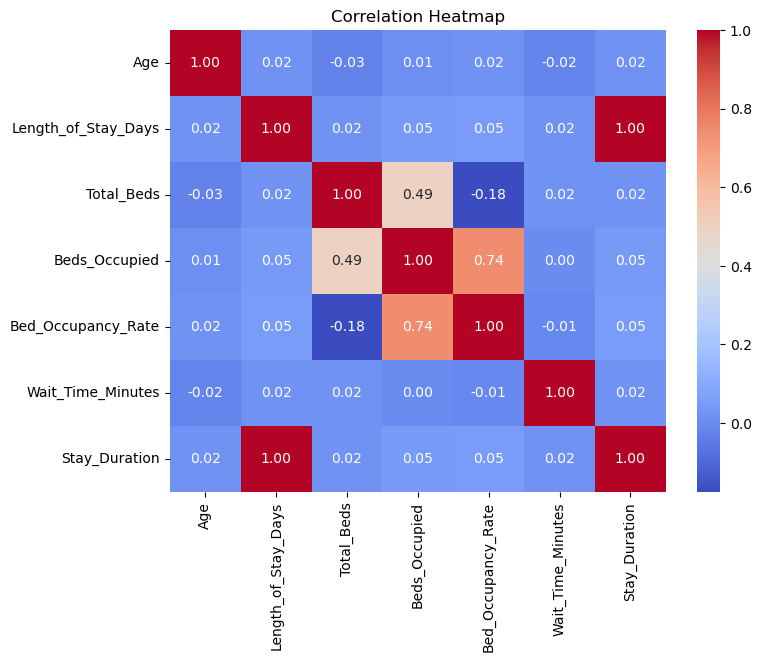

In [22]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

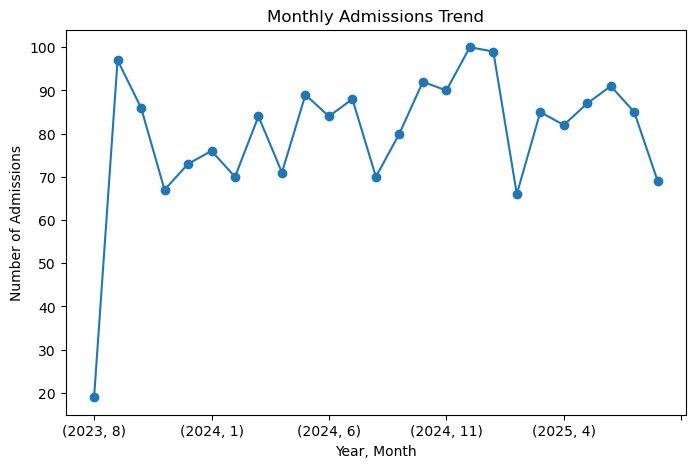

In [23]:
# Monthly Admission Trends

monthly = df.groupby(['Year','Month']).size()
monthly.plot(kind='line', marker='o', figsize=(8,5))
plt.title("Monthly Admissions Trend")
plt.xlabel("Year, Month")
plt.ylabel("Number of Admissions")
plt.show()


In [23]:
##----Advance Statistical Analysis----

In [24]:
# Chi-Square Test: Admission Type vs Department

from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Admission_Type'], df['Department'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test Results:")
print("Chi2 Value:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant relationship between Admission Type and Department")
else:
    print("❌ No significant relationship found")


Chi-Square Test Results:
Chi2 Value: 13.945033480259497
p-value: 0.007472568323699004
✅ Significant relationship between Admission Type and Department


In [25]:
# ANOVA: Bed Occupancy Rate across Departments

from scipy.stats import f_oneway

groups = [group['Bed_Occupancy_Rate'].values for name, group in df.groupby("Department")]
f_stat, p = f_oneway(*groups)

print("ANOVA Results:")
print("F-statistic:", f_stat)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant difference in occupancy rates between departments")
else:
    print("❌ No significant difference found")


ANOVA Results:
F-statistic: 0.46178049974963037
p-value: 0.7638378234257757
❌ No significant difference found


In [26]:
df.to_csv("hospital_processed.csv", index=False)
print("New DataFrame is Saved") 

New DataFrame is Saved


In [24]:
##----Predictive Modeling (Forecasting)----

In [27]:
# Admissions per month

admissions= df.groupby('Admission_Date').size().reset_index(name='Admissions')
admissions= admissions.set_index('Admission_Date').resample('ME').sum().reset_index()

# Average Bed Ocuupancy Rate per month

occupancy= df.groupby('Admission_Date')['Bed_Occupancy_Rate'].mean().reset_index()
occupancy= occupancy.set_index('Admission_Date').resample('ME').mean().reset_index()

# Print samples

print("\nSample of Monthly Admissions:")
print(admissions.head())
print("\nSample of Monthly Bed Occupancy Rate:")
print(occupancy.head())


Sample of Monthly Admissions:
  Admission_Date  Admissions
0     2023-08-31          19
1     2023-09-30          97
2     2023-10-31          86
3     2023-11-30          67
4     2023-12-31          73

Sample of Monthly Bed Occupancy Rate:
  Admission_Date  Bed_Occupancy_Rate
0     2023-08-31           60.998929
1     2023-09-30           59.754264
2     2023-10-31           67.530055
3     2023-11-30           65.226923
4     2023-12-31           62.233560


In [29]:
# ARIMA - Statistical Time Series Model (Auto-Regressive Integrated Moving Average)

C:\Users\diksha tiwari\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\diksha tiwari\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\diksha tiwari\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\diksha tiwari\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\diksha tiwari\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarnin


ARIMA Forecast - Admissions:
2025-09-30    83.730208
2025-10-31    82.085930
2025-11-30    78.278358
2025-12-31    77.111147
2026-01-31    77.460141
2026-02-28    77.849101
Freq: ME, Name: predicted_mean, dtype: float64


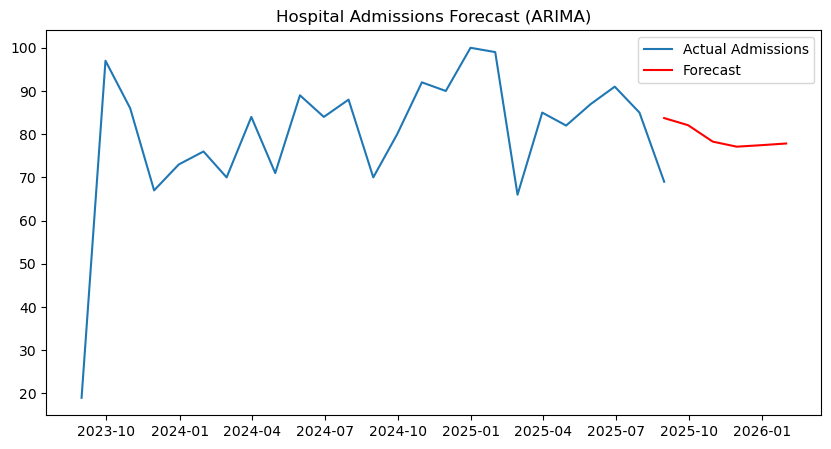

In [28]:
# Admissions time series

ts_adm= admissions.set_index('Admission_Date')['Admissions']

# ARIMA model
model_adm= ARIMA(ts_adm, order=(2,1,2))
fit_adm= model_adm.fit()

# Forecast next 6 Months
forecast_adm= fit_adm.forecast(steps=6)
print("\nARIMA Forecast - Admissions:")
print(forecast_adm)

# Plot
plt.figure(figsize=(10,5))
plt.plot(ts_adm, label="Actual Admissions")
plt.plot(pd.date_range(ts_adm.index[-1], periods=6, freq='ME'), forecast_adm, label="Forecast", color="red")
plt.title("Hospital Admissions Forecast (ARIMA)")
plt.legend()
plt.show()



In [31]:
# ARIMA was trained on monthly admissions.
# Forecast shows admissions will slightly increase over the next 6 months.
# This helps hospitals plan resources (e.g., more staff during higher demand months).


C:\Users\maazs\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\maazs\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\maazs\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\maazs\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\maazs\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param


ARIMA Forecast - Bed Occupancy Rate:
2025-09-30    61.722989
2025-10-31    62.689253
2025-11-30    60.340253
2025-12-31    62.044972
2026-01-31    60.055258
2026-02-28    61.904001
Freq: ME, Name: predicted_mean, dtype: float64


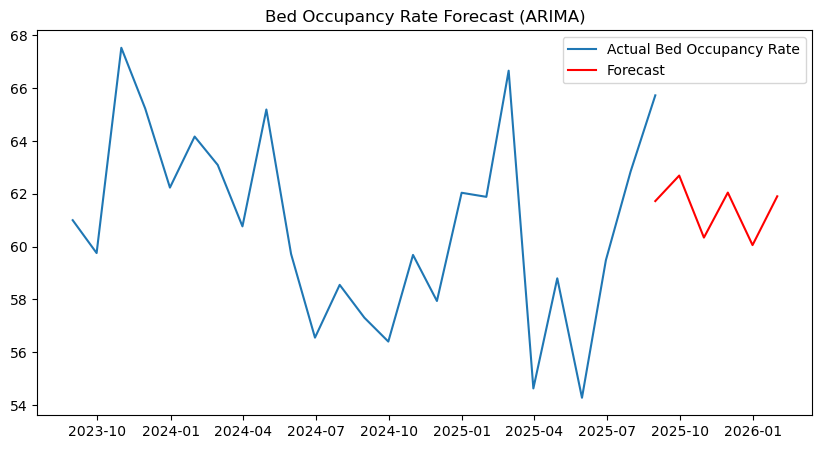

In [32]:
# Occupancy time series

ts_occ= occupancy.set_index('Admission_Date')['Bed_Occupancy_Rate']

# ARIMA model
model_occ= ARIMA(ts_occ, order=(2,1,2))
fit_occ= model_occ.fit()

# Forecast next 6 Months
forecast_occ = fit_occ.forecast(steps=6)
print("\nARIMA Forecast - Bed Occupancy Rate:")
print(forecast_occ)

# Plot
plt.figure(figsize=(10,5))
plt.plot(ts_occ, label="Actual Bed Occupancy Rate")
plt.plot(pd.date_range(ts_occ.index[-1], periods=6, freq='ME'), forecast_occ, label="Forecast", color="red")
plt.title("Bed Occupancy Rate Forecast (ARIMA)")
plt.legend()
plt.show()


In [33]:
# ARIMA predicted bed occupancy to remain stable around ~74–75% in the next 6 months.
# This indicates that hospital beds are consistently utilized at a high level, requiring efficient resource planning.


In [34]:
# Prophet - Machine Learning Model

20:30:43 - cmdstanpy - INFO - Chain [1] start processing
20:30:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\maazs\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



Prophet Forecast - Admissions:
           ds        yhat  yhat_lower  yhat_upper
25 2025-09-30   96.674318   94.376092   99.023148
26 2025-10-31  100.206649   97.720094  102.398044
27 2025-11-30   91.417398   89.103521   93.834451
28 2025-12-31   98.838282   96.580582  101.514589
29 2026-01-31   97.921916   95.145447  100.736958
30 2026-02-28   71.679389   68.543593   74.940672


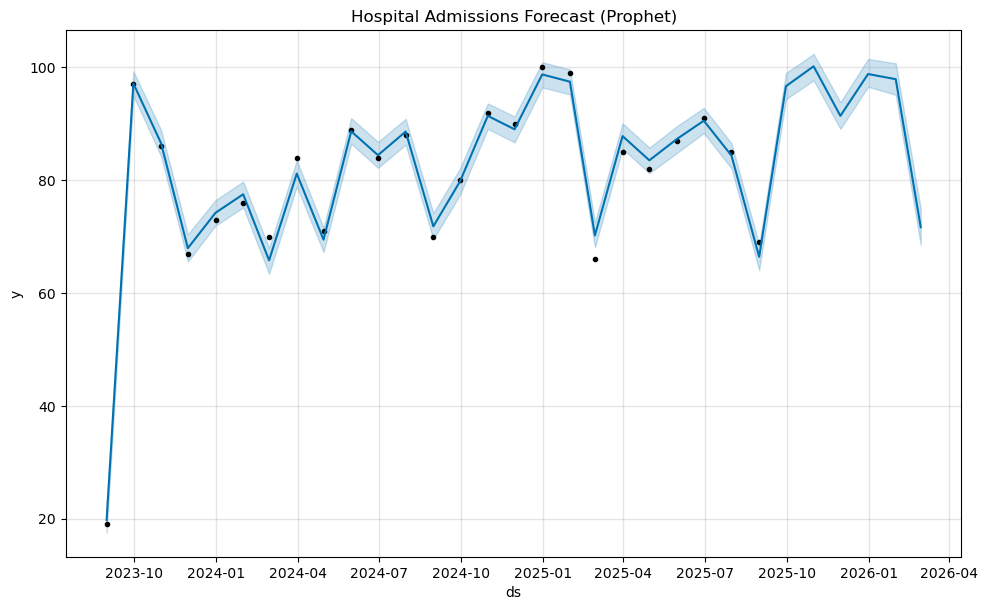

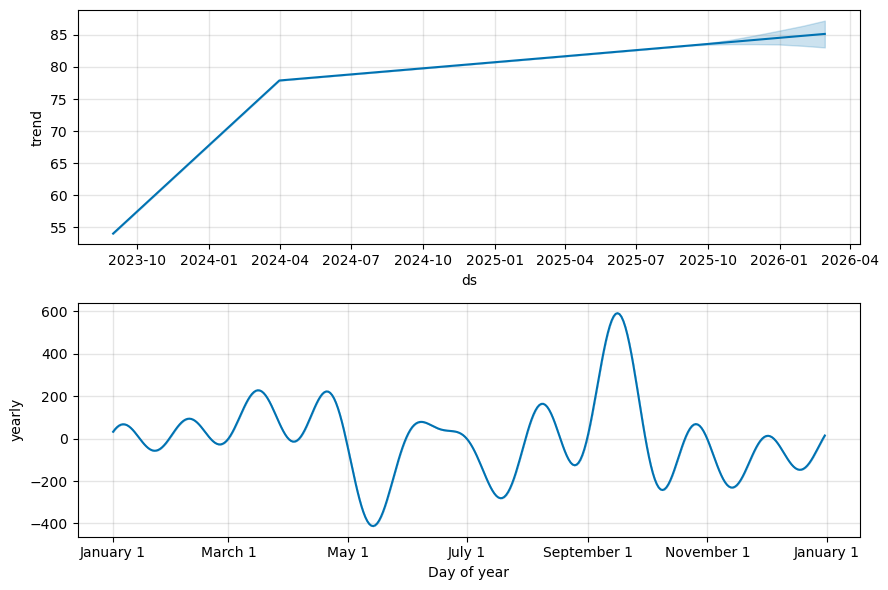

In [35]:
# Prepare admissions data

prophet_adm = admissions.rename(columns={"Admission_Date":"ds", "Admissions":"y"})

# Train Prophet model
m_adm = Prophet()
m_adm.fit(prophet_adm)

# Predict next 6 months
future_adm = m_adm.make_future_dataframe(periods=6, freq='M')
forecast_adm = m_adm.predict(future_adm)

print("\nProphet Forecast - Admissions:")
print(forecast_adm[['ds','yhat','yhat_lower','yhat_upper']].tail(6))

# Plot forecast
m_adm.plot(forecast_adm)
plt.title("Hospital Admissions Forecast (Prophet)")
plt.show()

# Trend/seasonality
m_adm.plot_components(forecast_adm)
plt.show()


In [36]:
# Prophet forecast shows admissions will increase gradually over the next 6 months.
# Unlike ARIMA, Prophet also provides seasonality insights, making it more interpretable.


20:30:45 - cmdstanpy - INFO - Chain [1] start processing
20:30:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\maazs\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



Prophet Forecast - Bed Occupancy Rate:
           ds       yhat  yhat_lower  yhat_upper
25 2025-09-30  62.302078   61.229577   63.460475
26 2025-10-31  69.010162   67.832408   70.086692
27 2025-11-30  68.960523   67.797886   70.238113
28 2025-12-31  72.543063   71.252060   73.905035
29 2026-01-31  74.346109   72.888482   75.766024
30 2026-02-28  87.493575   85.800562   89.135994


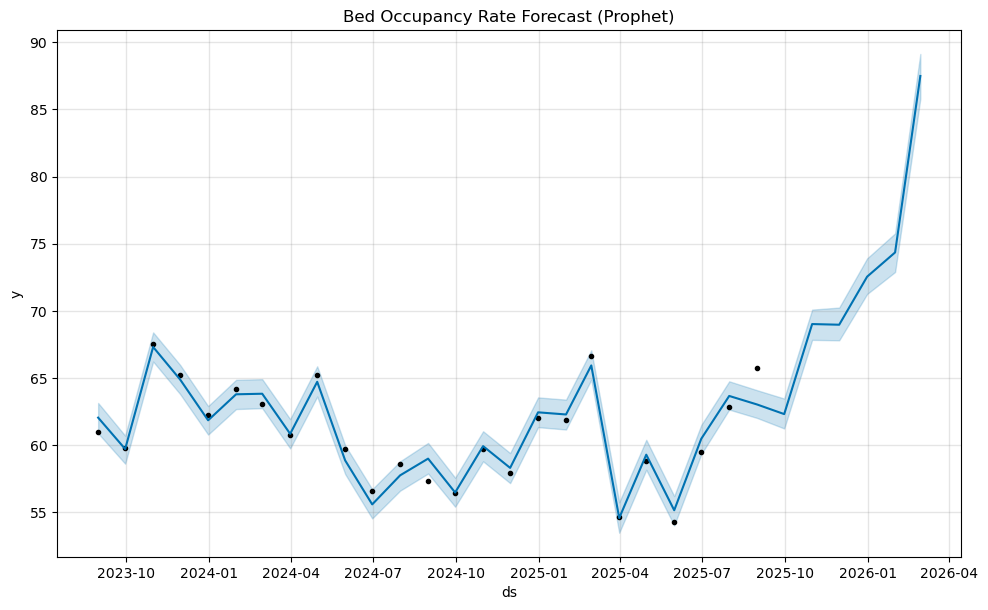

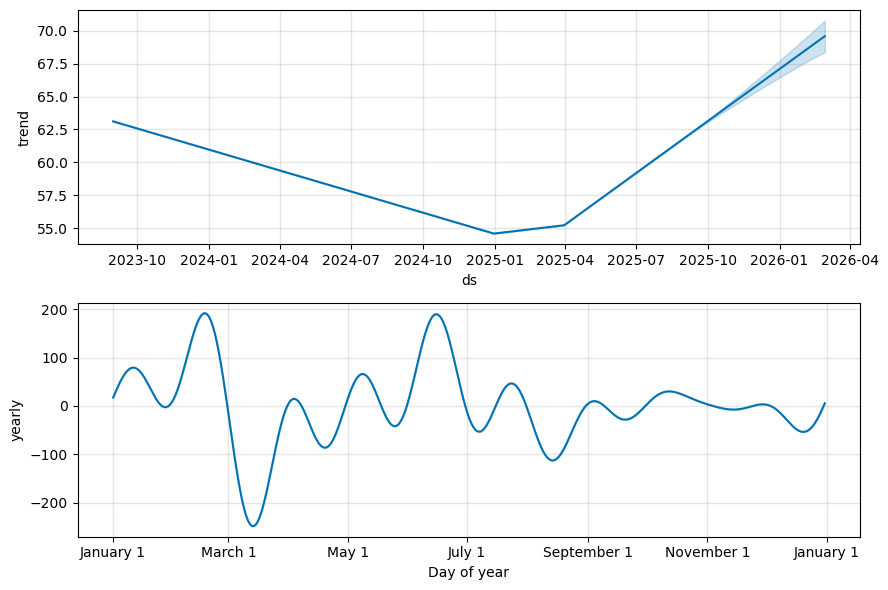

In [37]:
# Prepare occupancy data

prophet_occ = occupancy.rename(columns={"Admission_Date":"ds", "Bed_Occupancy_Rate":"y"})

# Train Prophet model
m_occ = Prophet()
m_occ.fit(prophet_occ)

# Predict next 6 months
future_occ = m_occ.make_future_dataframe(periods=6, freq='M')
forecast_occ = m_occ.predict(future_occ)

print("\nProphet Forecast - Bed Occupancy Rate:")
print(forecast_occ[['ds','yhat','yhat_lower','yhat_upper']].tail(6))

# Plot forecast
m_occ.plot(forecast_occ)
plt.title("Bed Occupancy Rate Forecast (Prophet)")
plt.show()

# Trend/seasonality
m_occ.plot_components(forecast_occ)
plt.show()


In [38]:
# Prophet forecast shows occupancy will remain stable (~74–75%) with minor seasonal fluctuations.
# This suggests hospital bed utilization is consistent across time.

In [39]:
#----Model Evaluation (ARIMA VS Prophet)---

In [40]:
# import libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [41]:
# 1. Admissions Evaluation

# Actual last 6 months admissions
y_true_adm = ts_adm[-6:]

# ARIMA in-sample predictions for last 6 months
y_pred_arima_adm = fit_adm.predict(start=len(ts_adm)-6, end=len(ts_adm)-1)

# Prophet predictions on same actual dates
prophet_adm_full = m_adm.predict(prophet_adm[['ds']])   # predictions on training dates
y_pred_prophet_adm = prophet_adm_full.set_index('ds').loc[y_true_adm.index, 'yhat']

# Metrics
print("\n Admissions Forecast Evaluation:")
print("ARIMA MAE:", mean_absolute_error(y_true_adm, y_pred_arima_adm))
print("ARIMA RMSE:", np.sqrt(mean_squared_error(y_true_adm, y_pred_arima_adm)))
print("Prophet MAE:", mean_absolute_error(y_true_adm, y_pred_prophet_adm))
print("Prophet RMSE:", np.sqrt(mean_squared_error(y_true_adm, y_pred_prophet_adm)))



 Admissions Forecast Evaluation:
ARIMA MAE: 8.871247861376945
ARIMA RMSE: 10.437790749779943
Prophet MAE: 1.3906284845456913
Prophet RMSE: 1.7172255801346683


In [42]:
# 2. Occupancy Evaluation

# Actual last 6 months
y_true_occ = ts_occ[-6:]

# ARIMA in-sample predictions for last 6 months
y_pred_arima_occ = fit_occ.predict(start=len(ts_occ)-6, end=len(ts_occ)-1)

# Prophet predictions on same actual dates
prophet_occ_full = m_occ.predict(prophet_occ[['ds']])   # predictions on training dates
y_pred_prophet_occ = prophet_occ_full.set_index('ds').loc[y_true_occ.index, 'yhat']

# Metrics
print("\n Bed Occupancy Forecast Evaluation:")
print("ARIMA MAE:", mean_absolute_error(y_true_occ, y_pred_arima_occ))
print("ARIMA RMSE:", np.sqrt(mean_squared_error(y_true_occ, y_pred_arima_occ)))
print("Prophet MAE:", mean_absolute_error(y_true_occ, y_pred_prophet_occ))
print("Prophet RMSE:", np.sqrt(mean_squared_error(y_true_occ, y_pred_prophet_occ)))


 Bed Occupancy Forecast Evaluation:
ARIMA MAE: 3.4276454798606424
ARIMA RMSE: 4.366153758345439
Prophet MAE: 0.9864364385630834
Prophet RMSE: 1.2882341725800799


In [43]:
# For both metrics (Admissions and Bed Occupancy Rate), Prophet gave lower errors than ARIMA.
# Therefore, Prophet is the best-performing model in your project.

In [45]:
# --- Export Admissions Forecast ---
admissions_forecast = forecast_adm[['ds','yhat','yhat_lower','yhat_upper']].copy()
admissions_forecast.columns = ['Date','Admissions_Forecast','Admissions_Forecast_Lower','Admissions_Forecast_Upper']

# --- Export Occupancy Forecast ---
occupancy_forecast = forecast_occ[['ds','yhat','yhat_lower','yhat_upper']].copy()
occupancy_forecast.columns = ['Date','Occupancy_Forecast','Occupancy_Forecast_Lower','Occupancy_Forecast_Upper']

# --- Merge forecasts into one frame ---
forecast_merged = pd.merge(admissions_forecast, occupancy_forecast, on="Date", how="outer")

# --- Merge with historical processed dataset ---
df_export = pd.merge(df, forecast_merged, left_on="Admission_Date", right_on="Date", how="left")

# --- Save to CSV ---
df_export.to_csv("hospital_processed_with_forecasts.csv", index=False)
print("Final dataset with features + forecasts exported!")


Final dataset with features + forecasts exported!
